In [407]:
"""code @ https://github.com/Audhil/tensorflow_cookbook/blob/master/01_Introduction/02_Creating_and_Using_Tensors/02_tensors.ipynb"""

import tensorflow as tf
from tensorflow.python.framework import ops
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

ops.reset_default_graph()


In [408]:
with tf.Session() as sess:
    """Creating Tensors"""
    my_tensor = tf.zeros([1, 20])
    print('my_tensor: ', sess.run(my_tensor))
    my_var = tf.Variable(tf.zeros([2, 5]))
    sess.run(tf.global_variables_initializer())
    print('my_var: ', sess.run(my_var))
    row_dim = 2
    col_dim = 4
    zero_var = tf.Variable(tf.zeros([row_dim, col_dim]))
    ones_var = tf.Variable(tf.ones([row_dim, col_dim]))
    sess.run(tf.global_variables_initializer())
    print('zero_var: ', sess.run(zero_var))
    print('ones_var: ', sess.run(ones_var))
    """Creating Tensors Based on Other Tensor's Shape"""
    zero_similar = tf.Variable(tf.zeros_like(zero_var))
    ones_similar = tf.Variable(tf.ones_like(ones_var))
    sess.run(tf.global_variables_initializer())
    print('zero_similar: ', sess.run(zero_similar))
    print('ones_similar: ', sess.run(ones_similar))
    """Filling a Tensor with a Constant"""
    fill_var = tf.Variable(tf.fill([row_dim, col_dim], -4))
    sess.run(tf.global_variables_initializer())
    print('fill_var: ', sess.run(fill_var))
    # Create a variable from a constant
    const_var = tf.Variable(tf.constant([8, 6, 7, 5, 3, 0, 9]))
    sess.run(tf.global_variables_initializer())
    print('const_var: ', sess.run(const_var))
    const_fill_var = tf.Variable(tf.constant(-3, shape=[row_dim, col_dim]))
    sess.run(tf.global_variables_initializer())
    print('const_fill_var: ', sess.run(const_fill_var))
    """Creating Tensors Based on Sequences and Ranges"""
    # linspace - may be for float values
    lin_var = tf.Variable(tf.linspace(start=3., stop=9., num=3))
    sess.run(tf.global_variables_initializer())
    print('lin_var: ', sess.run(lin_var))
    # range
    rang_var = tf.Variable(tf.range(start=3, limit=9, delta=3))
    sess.run(tf.global_variables_initializer())
    print('lin_var: ', sess.run(rang_var))
    """Random Number Tensors"""
    rnorm_var = tf.random_normal([row_dim, col_dim], stddev=1.0, mean=0.0)
    print('rnorm_var: ', sess.run(rnorm_var))
    runif_var = tf.random_uniform([row_dim, col_dim], minval=1, maxval=7)
    print('runif_var: ', sess.run(runif_var))

    """Visualizing the Variable Creation in TensorBoard"""
    # Create variable
    my_var = tf.Variable(tf.zeros([1, 20]))
    # Add summaries to tensorboard
    merged = tf.summary.merge_all()
    # Initialize graph writer
    writer = tf.summary.FileWriter("/tmp/var_logs", graph=sess.graph)
    sess.run(tf.global_variables_initializer())
    """
    We now run the following command in our command prompt:
    tensorboard --logdir=/tmp
    And it will tell us the URL we can navigate our browser to to see Tensorboard. The default should be:
    http://0.0.0.0:6006/
    """
    """Placeholder"""
    x_place_holder = tf.placeholder(tf.float32, shape=(4, 4))
    print('val is x_place_holder : ', sess.run(x_place_holder, feed_dict={x_place_holder: np.random.rand(4, 4)}))


my_tensor:  [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]]
my_var:  [[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
zero_var:  [[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
ones_var:  [[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]
zero_similar:  [[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
ones_similar:  [[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]
fill_var:  [[-4 -4 -4 -4]
 [-4 -4 -4 -4]]
const_var:  [8 6 7 5 3 0 9]
const_fill_var:  [[-3 -3 -3 -3]
 [-3 -3 -3 -3]]
lin_var:  [ 3.  6.  9.]
lin_var:  [3 6]
rnorm_var:  [[ 0.63925219 -1.89646471  0.66266572 -1.2216959 ]
 [ 0.52498531  2.29509568 -0.44356921  0.77107173]]
runif_var:  [[ 1.94742846  3.35459542  5.67963028  5.56200027]
 [ 6.2623167   6.05349493  1.10954356  4.45236015]]


val is x_place_holder :  [[ 0.0832231   0.64036244  0.47459567  0.11434632]
 [ 0.41869581  0.21303803  0.8208949   0.71896428]
 [ 0.99175733  0.53123635  0.82594967  0.65547204]
 [ 0.86242795  0.24927445  0.9708634   0.07480583]]


In [409]:
"""Matrices and Matrix Operations"""
"""Declaring matrices"""
with tf.Session() as sess:
    # identity matrix
    identity_matrix = tf.diag([1., 1., 1.])
    print(sess.run(identity_matrix))
    # 2x3 random norm matrix
    A = tf.truncated_normal([2, 3])
    print(sess.run(A))
    # 2x3 constant matrix
    B = tf.fill([2, 3], 44.)
    print(sess.run(B))
    # 3x2 random uniform matrix
    C = tf.random_uniform([2, 3])
    print('C : ', sess.run(C))
    # Create matrix from np array
    D = tf.convert_to_tensor(np.array([[1., 2., 3.], [-3., -7., -1.], [0., 5., -2.]]))
    print(sess.run(D))
    """Matrix Operations"""
    print(sess.run(A + B))
    print(sess.run(B - B))
    print(sess.run(tf.matmul(B, identity_matrix)))
    print('D transpose : ', sess.run(tf.transpose(D)))
    print('matrix_determinant : ', sess.run(tf.matrix_determinant(D)))
    """Cholesky Decomposition"""
    print(sess.run(tf.cholesky(identity_matrix)))
    eigenvalues, eigenvectors = sess.run(tf.self_adjoint_eig(D))
    print('eigenvalues : ', eigenvalues)
    print('eigenvectors : ', eigenvectors)


[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
[[-1.14567637  0.48116842 -0.38919345]
 [ 1.52407587  0.38032597 -0.38250005]]
[[ 44.  44.  44.]
 [ 44.  44.  44.]]
C :  [[ 0.44361913  0.60667312  0.42279303]
 [ 0.24857605  0.76454198  0.65443778]]
[[ 1.  2.  3.]
 [-3. -7. -1.]
 [ 0.  5. -2.]]
[[ 44.35493469  43.10300064  45.83303452]
 [ 43.26262665  44.31661987  43.14339066]]
[[ 0.  0.  0.]
 [ 0.  0.  0.]]
[[ 44.  44.  44.]
 [ 44.  44.  44.]]
D transpose :  [[ 1. -3.  0.]
 [ 2. -7.  5.]
 [ 3. -1. -2.]]
matrix_determinant :  -38.0
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
eigenvalues :  [-10.65907521  -0.22750691   2.88658212]
eigenvectors :  [[ 0.21749542  0.63250104 -0.74339638]
 [ 0.84526515  0.2587998   0.46749277]
 [-0.4880805   0.73004459  0.47834331]]


In [410]:
"""Operations"""
with tf.Session() as sess:
    # divisions
    print(sess.run(tf.div(3, 6)))
    print(sess.run(tf.truediv(3, 4)))
    print(sess.run(tf.floordiv(3.0, 4.0)))
    # mods
    print(sess.run(tf.mod(22.0, 5.0)))
    # cross products
    print(sess.run(tf.cross([1., 0., 0.], [0., 1., 0.])))

    # trig functions
    print(sess.run(tf.sin(3.1416)))
    print(sess.run(tf.cos(3.1416)))
    print(sess.run(tf.div(tf.sin(3.1416 / 4.), tf.cos(3.1416 / 4.))))

    # Custom operations
    test_nums = range(15)

    def custom_polynomial(x_val):
        # Return 3x^2 - x + 10
        return tf.subtract(3 * tf.square(x_val), x_val) + 10

    print(sess.run(custom_polynomial(11)))
    expected_output = [3 * x * x - x + 10 for x in test_nums]
    print('expected_output : ', expected_output)
    [print('custom_polynomial output : ', sess.run(custom_polynomial(num))) for num in test_nums]


0
0.75
0.0
2.0
[ 0.  0.  1.]
-7.23998e-06
-1.0
1.0
362
expected_output :  [10, 12, 20, 34, 54, 80, 112, 150, 194, 244, 300, 362, 430, 504, 584]
custom_polynomial output :  10
custom_polynomial output :  12


custom_polynomial output :  20
custom_polynomial output :  34
custom_polynomial output :  54
custom_polynomial output :  80
custom_polynomial output :  112
custom_polynomial output :  150
custom_polynomial output :  194
custom_polynomial output :  244
custom_polynomial output :  300


custom_polynomial output :  362
custom_polynomial output :  430
custom_polynomial output :  504


custom_polynomial output :  584


In [411]:
"""Activation functions"""
"""1. refer images in the folder"""
"""2. refer activation_functions.txt for more info"""
# x_vals = tf.linspace(start=-10., stop=10., num=1000)
x_vals = tf.linspace(start=-10., stop=10., num=5)


In [412]:
"""ReLU activation"""
with tf.Session() as sess:
    print('x_vals : ', sess.run(x_vals))
    y_relu = sess.run(tf.nn.relu(x_vals))
    print('relu(x_vals) : ', y_relu)


x_vals :  [-10.  -5.   0.   5.  10.]
relu(x_vals) :  [  0.   0.   0.   5.  10.]


In [413]:
"""ReLU-6 activation"""
# x_vals = tf.convert_to_tensor([-2, 3, 55, 7, -1, 0])
with tf.Session() as sess:
    print('x_vals : ', sess.run(x_vals))
    y_relu6 = sess.run(tf.nn.relu6(x_vals))
    print('relu6(x_vals) : ', y_relu6)


x_vals :  [-10.  -5.   0.   5.  10.]


relu6(x_vals) :  [ 0.  0.  0.  5.  6.]


In [414]:
"""Sigmoid activation"""
with tf.Session() as sess:
    print('x_vals : ', sess.run(x_vals))
    y_sigmoid = sess.run(tf.nn.sigmoid(x_vals))
    print('sigmoid(x_vals) : ', y_sigmoid)


x_vals :  [-10.  -5.   0.   5.  10.]
sigmoid(x_vals) :  [  4.53978719e-05   6.69285096e-03   5.00000000e-01   9.93307173e-01
   9.99954581e-01]


In [415]:
"""tanh activation"""
with tf.Session() as sess:
    print('x_vals : ', sess.run(x_vals))
    y_tanh = sess.run(tf.nn.tanh(x_vals))
    print('tanh(x_vals) : ', y_tanh)


x_vals :  [-10.  -5.   0.   5.  10.]
tanh(x_vals) :  [-1.         -0.99990916  0.          0.99990916  1.        ]


In [416]:
"""Softsign activation"""
with tf.Session() as sess:
    print('x_vals : ', sess.run(x_vals))
    y_softsign = sess.run(tf.nn.softsign(x_vals))
    print('softsign(x_vals) : ', y_softsign)


x_vals :  [-10.  -5.   0.   5.  10.]
softsign(x_vals) :  [-0.90909094 -0.83333331  0.          0.83333331  0.90909094]


In [417]:
"""Softplus activation"""
with tf.Session() as sess:
    print('x_vals : ', sess.run(x_vals))
    y_softplus = sess.run(tf.nn.softplus(x_vals))
    print('softplus(x_vals) : ', y_softplus)


x_vals :  [-10.  -5.   0.   5.  10.]
softplus(x_vals) :  [  4.54177061e-05   6.71534892e-03   6.93147182e-01   5.00671530e+00
   1.00000458e+01]


In [418]:
"""Exponential Linear activation"""
with tf.Session() as sess:
    print('x_vals : ', sess.run(x_vals))
    y_elu = sess.run(tf.nn.elu(x_vals))
    print('elu(x_vals) : ', y_elu)


x_vals :  [-10.  -5.   0.   5.  10.]
elu(x_vals) :  [ -0.99995458  -0.99326205   0.           5.          10.        ]


AttributeError: 'Tensor' object has no attribute 'ndim'

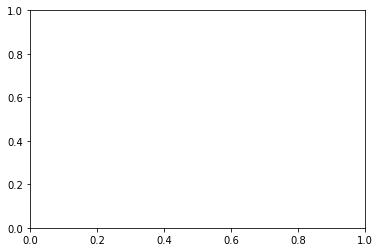

In [419]:
plt.plot(x_vals, y_softplus, 'r--', label='Softplus', linewidth=2)
plt.plot(x_vals, y_relu, 'b:', label='ReLU', linewidth=2)
plt.plot(x_vals, y_relu6, 'g-.', label='ReLU6', linewidth=2)
plt.plot(x_vals, y_elu, 'k-', label='ExpLU', linewidth=0.5)
plt.ylim([-1.5, 7])
plt.legend(loc='upper left')
plt.show()

plt.plot(x_vals, y_sigmoid, 'r--', label='Sigmoid', linewidth=2)
plt.plot(x_vals, y_tanh, 'b:', label='Tanh', linewidth=2)
plt.plot(x_vals, y_softsign, 'g-.', label='Softsign', linewidth=2)
plt.ylim([-2, 2])
plt.legend(loc='upper left')
plt.show()

"""something idiotic kinda error, leaving it as of now!"""


<img src="relu.png">